In [55]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [56]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = "BTC-USD"
stock_data = yf.download(stock, start=start, end = end)

[*********************100%***********************]  1 of 1 completed


In [71]:
stock_data.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-04-02,82485.710938,88466.953125,82343.539062,85180.609375,47584398470
2025-04-03,83102.828125,83909.296875,81282.101562,82487.476562,36852112080
2025-04-04,83843.804688,84696.148438,81670.750000,83100.250000,45157640207
2025-04-05,83504.796875,84207.015625,82377.734375,83844.703125,14380803631
2025-04-06,79429.140625,83659.023438,79429.140625,83502.171875,19713425408


In [72]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3855.0,2.140754e+04,2.467391e+04,1.781030e+02,1.660030e+03,9.653680e+03,3.466816e+04,1.061463e+05
High,BTC-USD,3855.0,2.186141e+04,2.518003e+04,2.117310e+02,1.670690e+03,9.804794e+03,3.551544e+04,1.091149e+05
Low,BTC-USD,3855.0,2.088774e+04,2.410340e+04,1.715100e+02,1.578340e+03,9.437336e+03,3.354561e+04,1.052917e+05
Open,BTC-USD,3855.0,2.138824e+04,2.466002e+04,1.768970e+02,1.588195e+03,9.645670e+03,3.466234e+04,1.061473e+05
Volume,BTC-USD,3855.0,1.920126e+10,2.078369e+10,5.914570e+06,7.101115e+08,1.532927e+10,3.044080e+10,3.509679e+11


In [73]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3855 entries, 2014-09-17 to 2025-04-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3855 non-null   float64
 1   (High, BTC-USD)    3855 non-null   float64
 2   (Low, BTC-USD)     3855 non-null   float64
 3   (Open, BTC-USD)    3855 non-null   float64
 4   (Volume, BTC-USD)  3855 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.7 KB


In [74]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [75]:
#Close price data
closing_price = stock_data[['Close']]

In [76]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-04-02,82485.710938
2025-04-03,83102.828125
2025-04-04,83843.804688


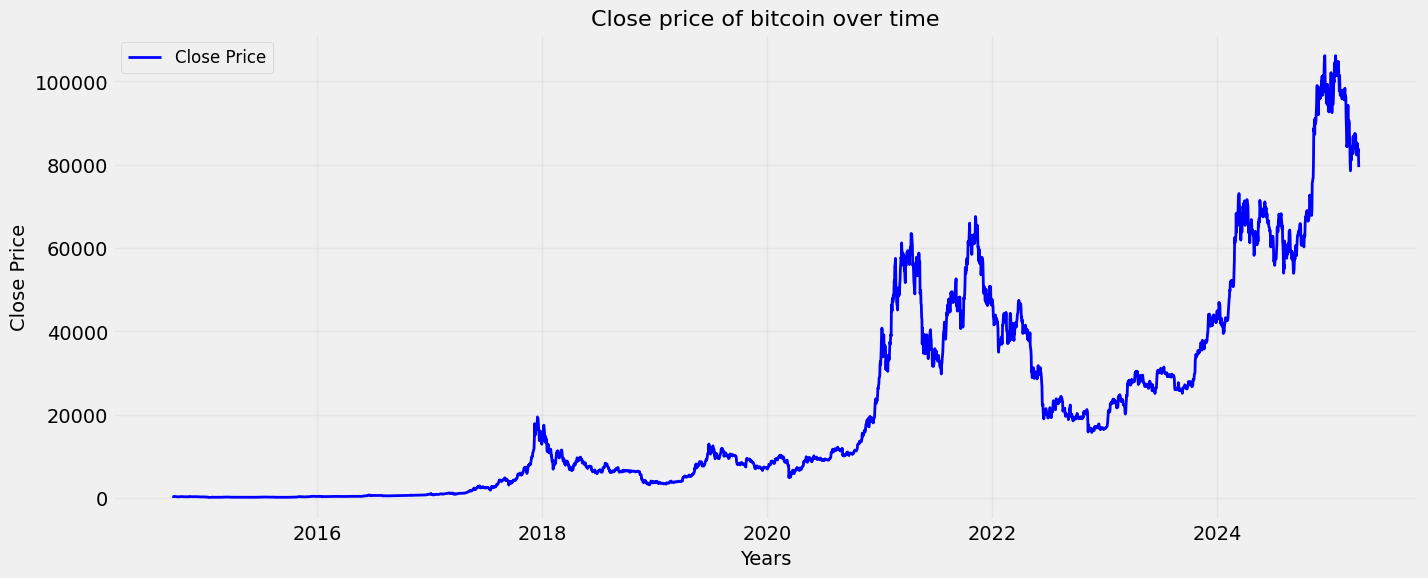

In [77]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [78]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [79]:
df1 = pd.DataFrame(temp_data)

In [80]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [81]:
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [82]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\rapak\AppData\Local\Temp\ipykernel_16788\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\rapak\AppData\Local\Temp\ipykernel_16788\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


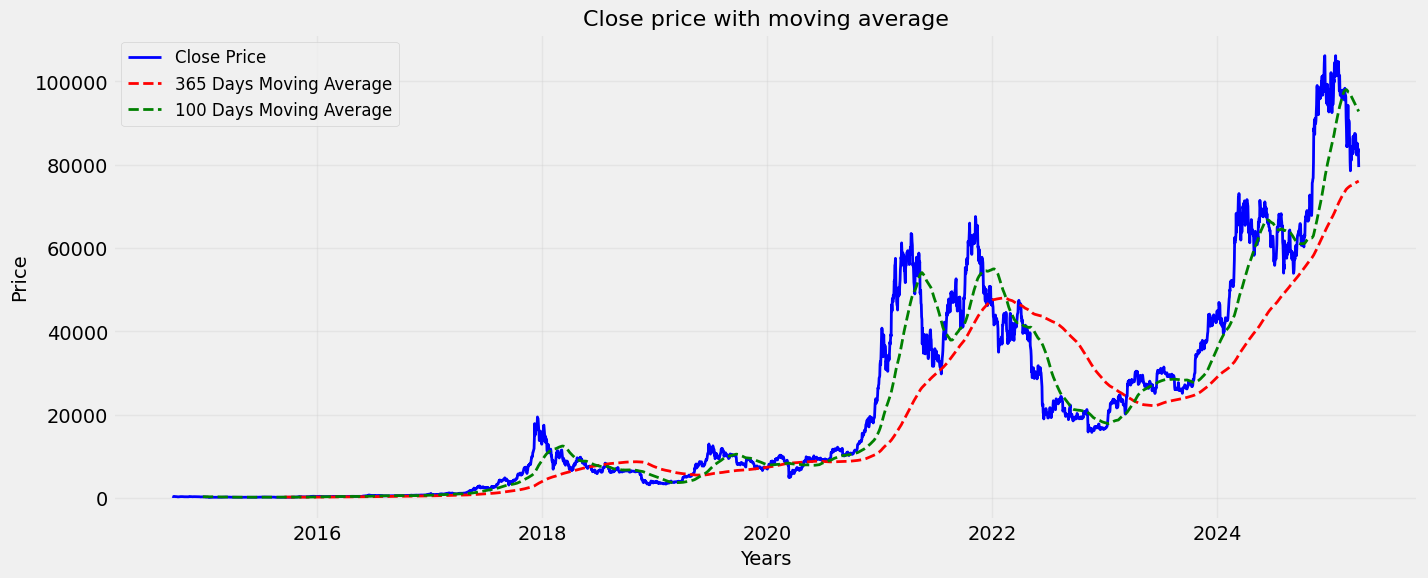

In [83]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [84]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [85]:
len(scaled_data)

3855

In [86]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [87]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [90]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [91]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

C:\Users\rapak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 90ms/step - loss: 0.0046
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - loss: 9.5784e-04
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 5.6963e-04
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 4.9734e-04
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 4.6180e-04
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 4.6284e-04
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - loss: 4.7291e-04
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - loss: 4.2236e-04
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - loss: 4.3473e-04
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - loss: 4.5136e-04


In [92]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


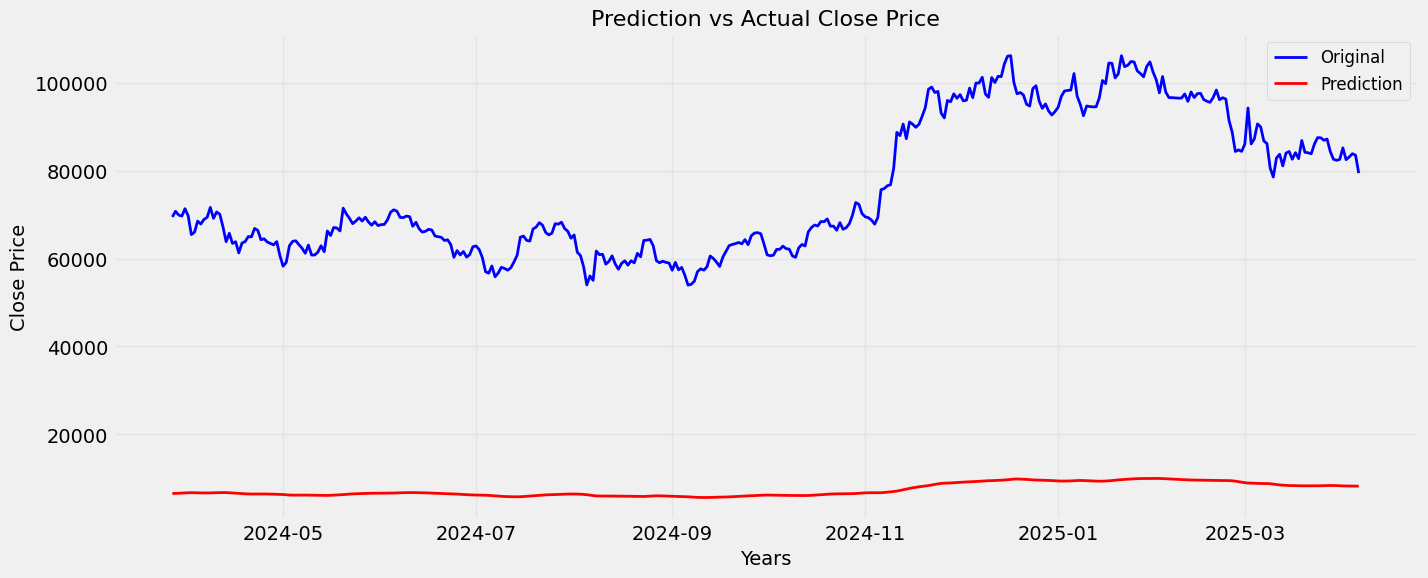

In [93]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [94]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [95]:
future_predictions

[array([[8166.482]], dtype=float32),
 array([[7588.741]], dtype=float32),
 array([[6842.793]], dtype=float32),
 array([[6091.9834]], dtype=float32),
 array([[5406.3096]], dtype=float32),
 array([[4807.863]], dtype=float32),
 array([[4295.451]], dtype=float32),
 array([[3858.2573]], dtype=float32),
 array([[3482.9211]], dtype=float32),
 array([[3156.8882]], dtype=float32)]

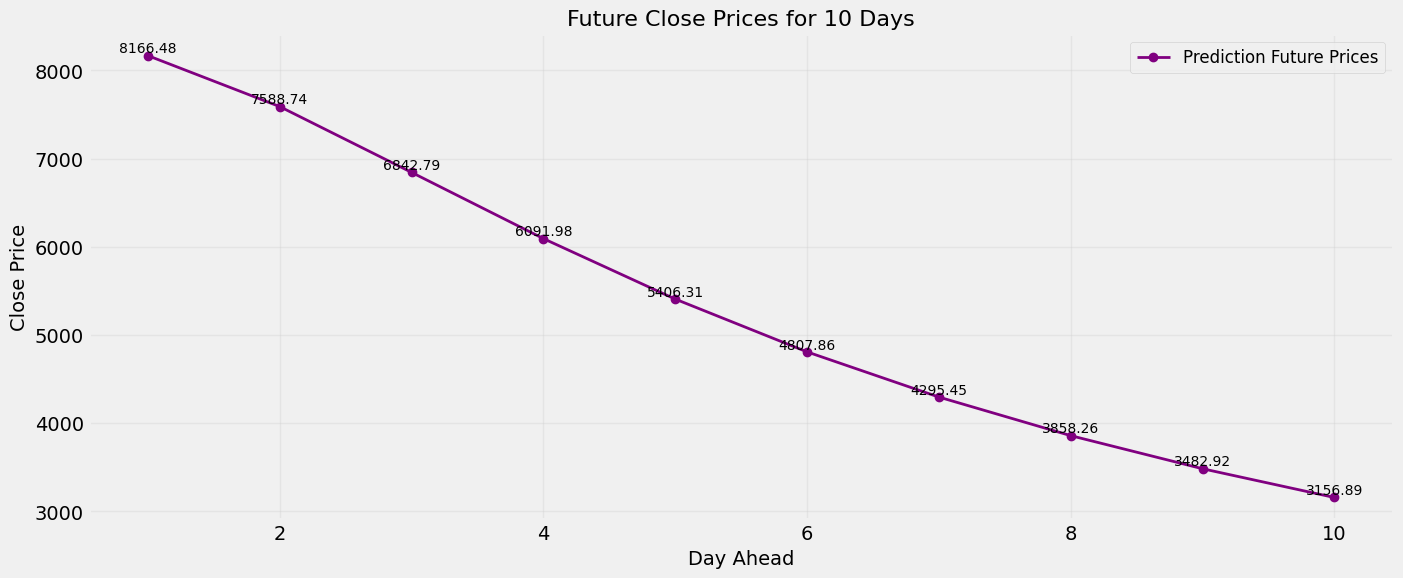

In [96]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [97]:
model.save("model.keras")